In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import scipy.optimize as opt
from scipy.optimize import curve_fit
import spinmob as s
# import os 
# Add errors to resulting field value

In [2]:
def linear(V, m, b):
    return m*V + b


def linearErr(V, erV, m, erM, b, erb):
    return np.sqrt( (m*V)**2*( (erM/m)**2+ (erV/V)**2) + (erb)**2 )


In [3]:
CalData = np.transpose(np.loadtxt("Calibration_EQ6085.csv", delimiter=',', skiprows = 1))

print(CalData[0])

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53]


In [4]:
#1G = 1e(-4)T
#1T = 10 000 G
# so 0.5 T is 5000G -> 5kG


# for i in range(0, int(len(final_result)/10)):
popt, pcov = curve_fit(linear, CalData[0][0:-9], CalData[1][0:-9])
errP = np.sqrt(np.diag(pcov))
mMag = popt[0]
bMag = popt[1]

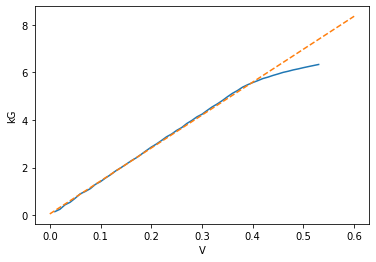

In [5]:
V = np.linspace(0, .6, 100)

plt.plot(CalData[0], CalData[1])
plt.plot(V, linear(V, popt[0], popt[1]), ls="--")

# plt.title("T vs mV")
plt.xlabel('V')
plt.ylabel('kG')
plt.show()

In [6]:
def getMagFromVolt_Err(V, ErrV):
    magFied = linear(Voltage, mMag, bMag)
    
    Err = linearErr(V, ErrV, mMag, errP[0], bMag, errP[1])
    return [magFied, Err]
    

In [16]:
Voltage = 0.358
VoltErr = 0.012*Voltage + 3**3*(1e-7) #this is sorta for the wrong range

magFied = getMagFromVolt_Err(Voltage, VoltErr)

print("%f(%.4f) kG, or %f T" %(magFied[0], magFied[1], magFied[0]/10))

5.009539(0.0703) kG, or 0.500954 T
